# This is the demo to apply our AutoML system to AdultDataset

## dataset_metric you can select and their ranges
'mean_difference': [-1,1] close to 0 <br>
'statistical_parity_difference': [-1,1] close to 0 <br>
'disparate_impact': > 0  The larger the better<br>
'consistency': [0, 1]: The larger the better

## classifier_metric (optimal range)
"Statistical parity difference" : [-0.1, 0.1]<br>
"Mean difference": [-0.1, 0.1] <br>
"Disparate impact": [0.8,1.2] <br>
"Average odds difference" [-0.1, 0.1] <br>
"Equal opportunity difference" [-0.1, 0.1] <br>
"Theil index": [0, 0.2]

In [9]:
import warnings
warnings.filterwarnings('ignore')
import AutoML
import pandas as pd
import numpy as np
from importlib import reload
pd.set_option('display.max_columns', None)
reload(AutoML)
import matplotlib.pyplot as plt
%matplotlib inline
from aif360.algorithms.preprocessing.optim_preproc_helpers.distortion_functions\
            import get_distortion_adult
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult


df = load_preproc_data_adult()
train, test = df.split([0.5], shuffle=True)

privileged_groups = [{'race': 1}] # White
unprivileged_groups = [{'race': 0}] # Not white
optim_options = {
    "distortion_fun": get_distortion_adult,
    "epsilon": 0.05,
    "clist": [0.99, 1.99, 2.99],
    "dlist": [.1, 0.05, 0]
}

model = AutoML.FairAutoML(input_columns = train.feature_names, label_name = train.label_names, \
                          favorable_classes = [train.favorable_label], \
                          protected_attribute_names = train.protected_attribute_names, \
                          privileged_classes = train.privileged_protected_attributes, privileged_groups = privileged_groups, \
                          unprivileged_groups =  unprivileged_groups, is_valid = True)
model.fit(train, dataset_metric="disparate_impact", dataset_metric_threshold=0.9,
            classifier_metric="Disparate impact", optim_options = optim_options,
            time_left_for_this_task=200, per_run_time_limit=20, train_split_size=0.8,
            verbose=True)


#### Original training dataset

Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances) = 0.621812
No discrimination potential, no need for fairness preprocessing:  False
--------------Start Preprocessing--------------
25250 17561.714261620935
25500 11440.978660687239
25750 10460.363677489726
26000 10192.487502786633
26250 9770.490491875467
26500 9505.24288123524
26750 9620.907293638937
27000 9346.550268160914
27250 9204.965632306366
27500 9156.615210700942
27750 8925.728529573118
28000 8769.253184605977
28250 8750.114597049585
28500 8734.886498173058
28750 8723.703361005968
29000 8710.03283476395
29250 8938.09272034944
29500 8697.616375237738
29750 8681.680671464324
30000 8654.003253980052
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances) after LFR with transform threshold = 0.1 = 0.7704886348622849
--------------Start Fitting Model--------------


Best balanced accuracy (after fairness processing) = 0.6409
Optimal classification threshold (after fairness processing) = 0.5500

35250 11577.658691204604
35500 11361.923252919492
35750 10963.933464838443
36000 10146.359416616599
36250 9616.018299519106
36500 9514.563523621315
36750 9736.110115383994
37000 9293.115061914501
37250 9340.888071031997
37500 9078.947759815288
37750 9065.71025549555
38000 8997.22713668266
38250 8916.543547829848
38500 8885.357540441048
38750 8835.508263449034
39000 8789.215863817108
39250 8736.926849968846
39500 8717.931093358506
39750 8690.100249748952
40000 8661.006186833187
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances) after LFR with transform threshold = 0.5 = 0.3990899664105043
--------------Start Fitting Model--------------
[WARNING] [2019-12-08 20:55:09,770:EnsembleBuilder(1):9abf4974c07797d204e9a606c60dbb82] No models better than random - using Dummy Score!


Best balanced accuracy (after fairness processing) = 0.5271
Optimal classification threshold (after fairness processing) = 0.0500

45250 14257.3826469354
45500 11332.496316147039
45750 11160.835099492799
46000 10432.60274152859
46250 10106.631044131977
46500 9949.630628643257
46750 9763.5529186727
47000 9309.652774936476
47250 9160.999709173298
47500 8986.10835613919
47750 8897.508364367075
48000 8813.15029869173
48250 8721.993214801138
48500 8671.87495114259
48750 8660.914673039748
49000 8629.223744494242
49250 8606.064349704648
49500 8597.284026276788
49750 8586.746281505308
50000 8573.573016686874
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances) after LFR with transform threshold = 0.9 = nan
--------------Start Fitting Model--------------
[WARNING] [2019-12-08 21:04:57,061:EnsembleBuilder(1):500c342f8a4332bdce7a26709d79b43b] No models better than random - using Dummy Score!
[WARNING] [2019-12-0

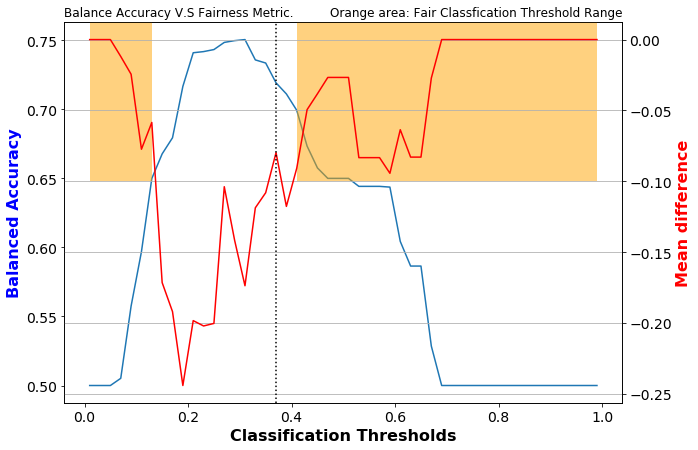

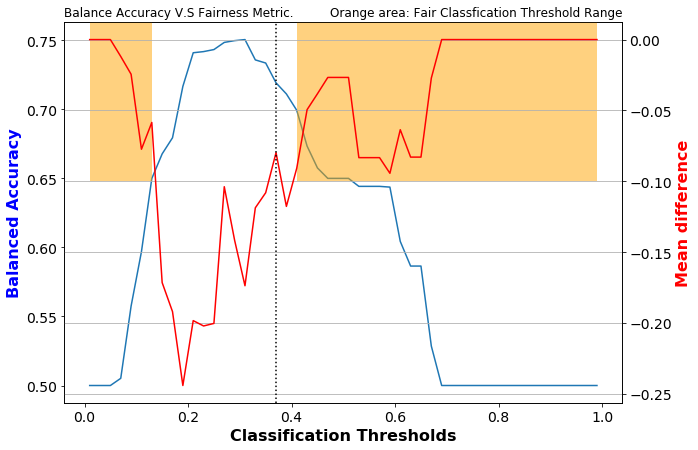

In [2]:
fig = model.plot()
fig

In [10]:
print(model.preproc_name)
print('Best classification threshold: {}'.format(model.best_ultimate_thres))
print('Best balanced accuracy: {}'.format(model.best_acc))

LFR with transform threshold = 0.1
Best classification threshold: 0.6900000000000001
Best balanced accuracy: 0.6873131088204163


In [19]:
metrics = model.evaluate(test)

Balanced accuracy = 0.6973
Statistical parity difference = -0.0594
Mean difference = -0.0594
Disparate impact = 0.8489
Average odds difference = -0.0278
Equal opportunity difference = -0.0422
Theil index = 0.1321
Optimal classification threshold (after fairness processing) = 0.3700


,Balanced accuracy,Statistical parity difference,Mean difference,Disparate impact,Average odds difference,Equal opportunity difference,Theil index
0,0.697252,-0.059351,-0.059351,0.848895,-0.027797,-0.042237,0.132081


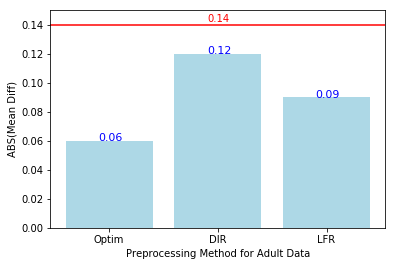

In [50]:
x = np.arange(3)
y = [0.06, 0.12, 0.09]
fig, ax = plt.subplots()
for i, v in enumerate(y):
    ax.text(i-0.1, 
              y[i], 
              y[i], 
              fontsize=11, 
              color='b')
plt.bar(x,y, color='lightblue')
plt.xlabel('Preprocessing Method for Adult Data')
plt.ylabel('ABS(Mean Diff)')
plt.axhline(y=0.14, color='red', linestyle='-')
plt.annotate('0.14', (0.9,0.142),color = 'red')
plt.xticks(x, ('Optim','DIR', 'LFR'))
plt.ylim((0, 0.15))
plt.show()

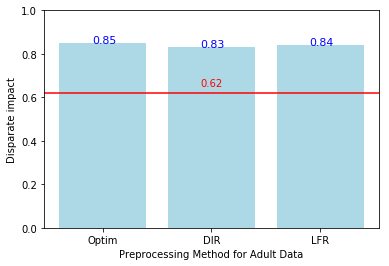

In [51]:
x = np.arange(3)
y = [0.85, 0.83, 0.84]
fig, ax = plt.subplots()
for i, v in enumerate(y):
    ax.text(i-0.1, 
              y[i], 
              y[i], 
              fontsize=11, 
              color='b')
plt.bar(x,y, color='lightblue')
plt.xlabel('Preprocessing Method for Adult Data')
plt.ylabel('Disparate impact')
plt.axhline(y=0.62, color='red', linestyle='-')
plt.annotate('0.62', (0.9,0.65),color = 'red')
plt.xticks(x, ('Optim','DIR', 'LFR'))
plt.ylim((0, 1))
plt.show()